In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Amazon Sales data.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
# Checking Dimensions of the amazon sales dataset
df.shape

(100, 14)

In [7]:
# Checking Null Values

df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Text(0.5, 1.0, 'Heat Map for Null Values')

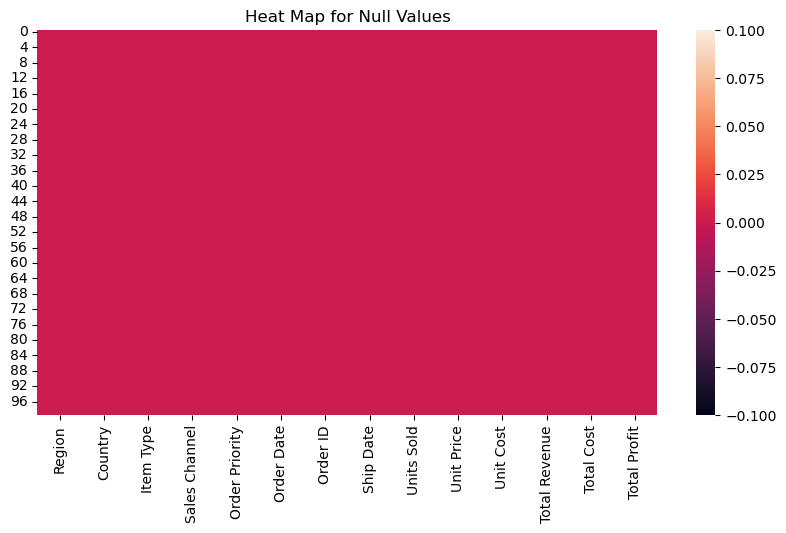

In [9]:
# Visualizing Null values, Where we can see there is no null values exits in our dataset
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.title("Heat Map for Null Values")

In [11]:
# Checking how many different types of datasample present in each features of amazon sales dataset

for feat in df.select_dtypes(include=['object','integer','float']):
    print(df.select_dtypes(include=['object','integer','float'])[feat].value_counts())

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64
Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64
Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64
Sales Channel
Offline    50
Online     50
Na

In [13]:
# Checking Basic Information for Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [15]:
# Converting Order Date Column into DateTime format

df['Order Date']=pd.to_datetime(df['Order Date'])
print("Order Date ")
df['Order Date']

Order Date 


0    2010-05-28
1    2012-08-22
2    2014-05-02
3    2014-06-20
4    2013-02-01
        ...    
95   2011-07-26
96   2011-11-11
97   2016-06-01
98   2015-07-30
99   2012-02-10
Name: Order Date, Length: 100, dtype: datetime64[ns]

In [17]:
# Converting Ship Date Column into DateTime format

df['Ship Date']=pd.to_datetime(df['Ship Date'])
print("Ship Date ")
df['Ship Date']
      

Ship Date 


0    2010-06-27
1    2012-09-15
2    2014-05-08
3    2014-07-05
4    2013-02-06
        ...    
95   2011-09-03
96   2011-12-28
97   2016-06-29
98   2015-08-08
99   2012-02-15
Name: Ship Date, Length: 100, dtype: datetime64[ns]

In [19]:
# Extracting Year from Order Date
df['Order_Year']=df['Order Date'].dt.year
df['Order_Year']

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: Order_Year, Length: 100, dtype: int32

In [21]:
# Extracting Month From Order Date
df['Order_Month']=df['Order Date'].dt.month
df['Order_Month']

0      5
1      8
2      5
3      6
4      2
      ..
95     7
96    11
97     6
98     7
99     2
Name: Order_Month, Length: 100, dtype: int32

In [23]:
# Extracting Year_Month From Order Date
df['Order_Year_Month']=df['Order Date'].dt.to_period('M')
df['Order_Year_Month']

0     2010-05
1     2012-08
2     2014-05
3     2014-06
4     2013-02
       ...   
95    2011-07
96    2011-11
97    2016-06
98    2015-07
99    2012-02
Name: Order_Year_Month, Length: 100, dtype: period[M]

In [535]:
# Hence we have extracted month,year and month_year from Order Date Successfully. We can see here......
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Year_Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.8,328376.44,248406.36,2012,8,2012-08


In [320]:
# Stastical Analysis of All Features except Object_type features
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,100,2013-09-16 14:09:36,2010-02-02 00:00:00,2012-02-14 12:00:00,2013-07-12 12:00:00,2015-04-07 00:00:00,2017-05-22 00:00:00,NaN
Order ID,100.0,555020412.36,114606559.0,338922488.0,557708561.0,790755080.75,994022214.0,260615257.131426
Ship Date,100,2013-10-09 22:48:00,2010-02-25 00:00:00,2012-02-24 18:00:00,2013-08-11 12:00:00,2015-04-28 00:00:00,2017-06-17 00:00:00,NaN
Units Sold,100.0,5128.71,124.0,2836.25,5382.5,7369.0,9925.0,2794.484562
Unit Price,100.0,276.7613,9.33,81.73,179.88,437.2,668.27,235.592241
Unit Cost,100.0,191.048,6.92,35.84,107.275,263.33,524.96,188.208181
Total Revenue,100.0,1373487.6831,4870.26,268721.2125,752314.36,2212044.6825,5997054.98,1460028.706824
Total Cost,100.0,931805.6991,3612.24,168868.0275,363566.385,1613869.7175,4509793.96,1083938.252188
Total Profit,100.0,441681.984,1258.02,121443.585,290767.995,635828.8,1719922.04,438537.90706
Order_Year,100.0,2013.23,2010.0,2012.0,2013.0,2015.0,2017.0,2.088231


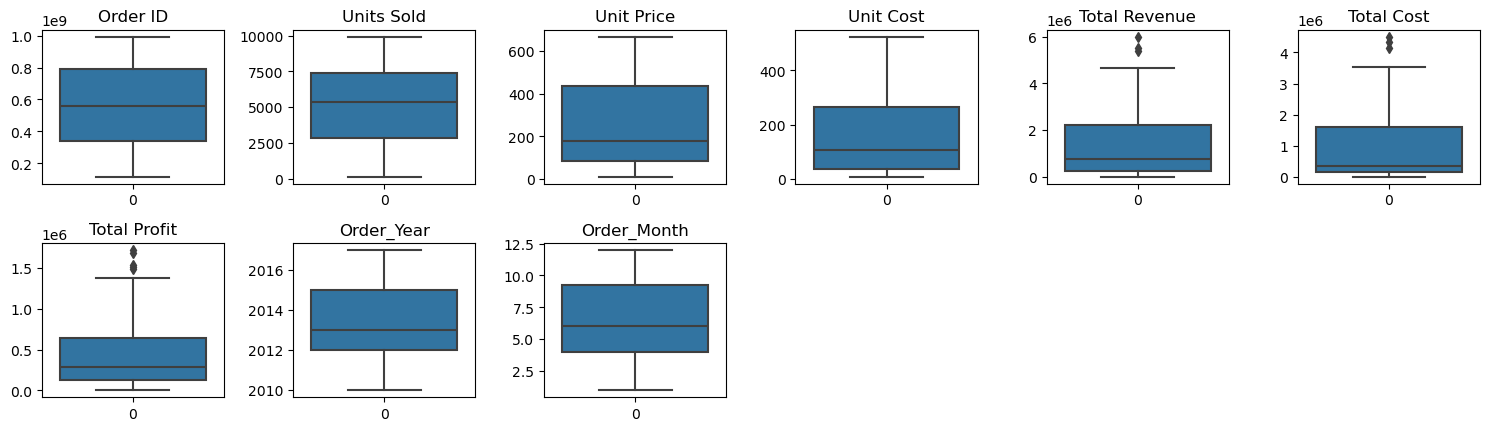

In [322]:
plt.figure(figsize=(15,15))
for i,var in enumerate(df.select_dtypes(include=['float','integer'])):
    plt.subplot(7,6,i+1)
    sns.boxplot(df.select_dtypes(include=['float','integer'])[var])
    plt.title(var)
plt.tight_layout()
plt.show()

Here we can see we have outliers in Total revenue, Total Cost and Total profit.But We Keep it as it is because these high value is neccesary for 
Analysis sales and profits

In [325]:
# Group By Region and Calculating the total revenue for each Region

revenue_by_region= df.groupby('Region')['Total Revenue'].sum().reset_index()
print("Total Revenue By Each Region")
revenue_by_region

Total Revenue By Each Region


,Region,Total Revenue
0,Asia,21347091.02
1,Australia and Oceania,14094265.13
2,Central America and the Caribbean,9170385.49
3,Europe,33368932.11
4,Middle East and North Africa,14052706.58
5,North America,5643356.55
6,Sub-Saharan Africa,39672031.43


In [327]:
# Sorting the region by total revenue for better visualiaztion

revenue_by_region=revenue_by_region.sort_values(by='Total Revenue',ascending=False)
revenue_by_region

,Region,Total Revenue
6,Sub-Saharan Africa,39672031.43
3,Europe,33368932.11
0,Asia,21347091.02
1,Australia and Oceania,14094265.13
4,Middle East and North Africa,14052706.58
2,Central America and the Caribbean,9170385.49
5,North America,5643356.55


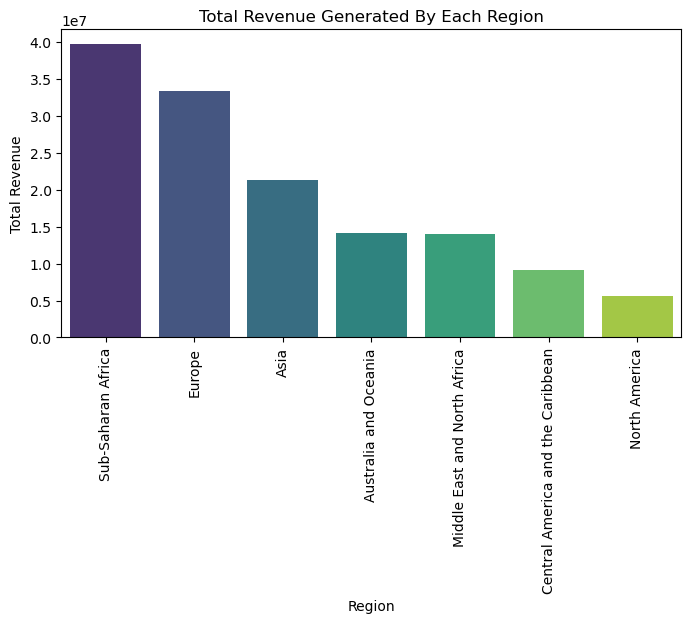

In [329]:
# Now Visualizing Region and Total Revenue by using seaborn

plt.figure(figsize=(8,4))
sns.barplot(x='Region',y='Total Revenue',data=revenue_by_region, palette='viridis')
plt.title('Total Revenue Generated By Each Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

In [331]:
# Group By Region and Calculating the total profit for each Region
profit_by_region= df.groupby('Region')['Total Profit'].sum().reset_index()

# Sorting the region by total profit for better visualiaztion
profit_by_region=profit_by_region.sort_values(by='Total Profit',ascending=False)
print("Total Profit By Region")
profit_by_region

Total Profit By Region


,Region,Total Profit
6,Sub-Saharan Africa,12183211.40
3,Europe,11082938.63
0,Asia,6113845.87
4,Middle East and North Africa,5761191.86
1,Australia and Oceania,4722160.03
2,Central America and the Caribbean,2846907.85
5,North America,1457942.76


In [333]:
# Group By Country and Calculating the total revenue for each country

revenue_by_country = df.groupby('Country')['Total Revenue'].sum().reset_index()
print("Total Revenue By Each Country")
revenue_by_country

Total Revenue By Each Country


,Country,Total Revenue
0,Albania,247956.32
1,Angola,2798046.49
2,Australia,2489933.49
3,Austria,1244708.40
4,Azerbaijan,4478800.21
...,...,...
71,The Gambia,5449517.95
72,Turkmenistan,5822036.20
73,Tuvalu,2533654.00
74,United Kingdom,188452.14


In [335]:
# Sorting the country by total revenue for better visualiaztion

revenue_by_country=revenue_by_country.sort_values(by='Total Revenue',ascending=False)
revenue_by_country

,Country,Total Revenue
24,Honduras,6336545.48
46,Myanmar,6161257.90
16,Djibouti,6052890.86
72,Turkmenistan,5822036.20
41,Mexico,5643356.55
...,...,...
70,Syria,35304.72
63,Slovakia,26344.26
47,New Zealand,20404.71
30,Kyrgyzstan,19103.44


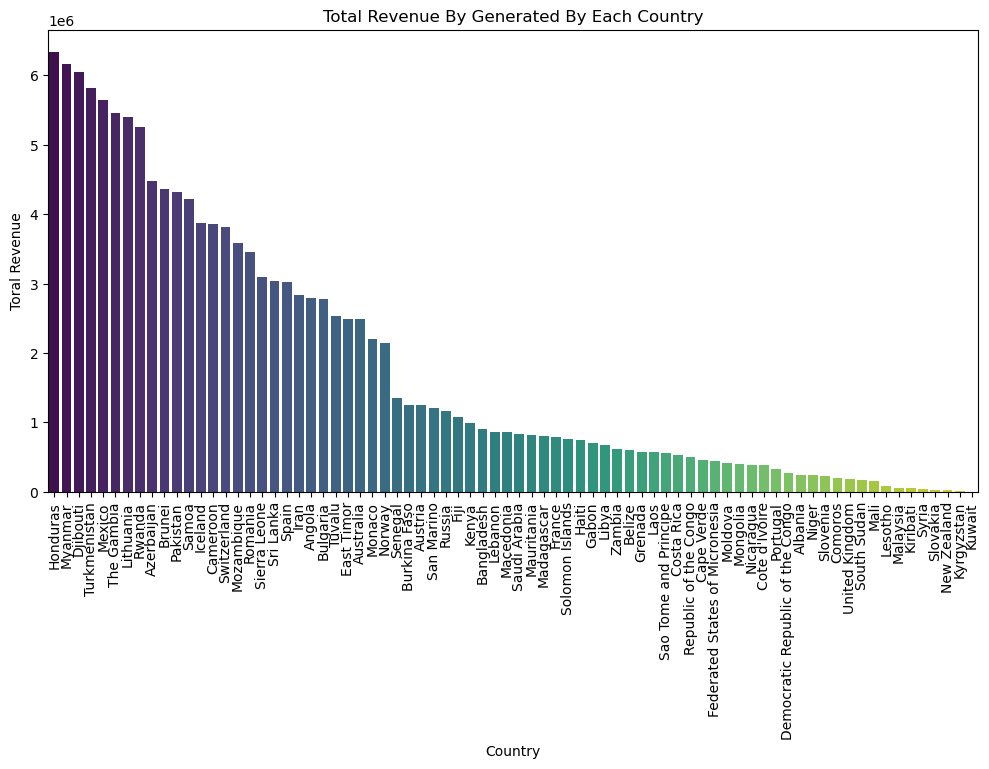

In [337]:
# ploting using seaborn

plt.figure(figsize=(12,6))
sns.barplot(x='Country',y='Total Revenue',data=revenue_by_country, palette='viridis')
plt.title('Total Revenue By Generated By Each Country')
plt.xlabel('Country')
plt.ylabel('Toral Revenue')
plt.xticks(rotation=90)
plt.show()

In [339]:
# Group By Items and Calculating the total profit  for each items

item_profit = df.groupby('Item Type')['Total Profit'].sum().reset_index()
item_profit

,Item Type,Total Profit
0,Baby Food,3886643.70
1,Beverages,888047.28
2,Cereal,2292443.43
3,Clothes,5233334.40
4,Cosmetics,14556048.66
5,Fruits,120495.18
6,Household,7412605.71
7,Meat,610610.00
8,Office Supplies,5929583.75
9,Personal Care,1220622.48


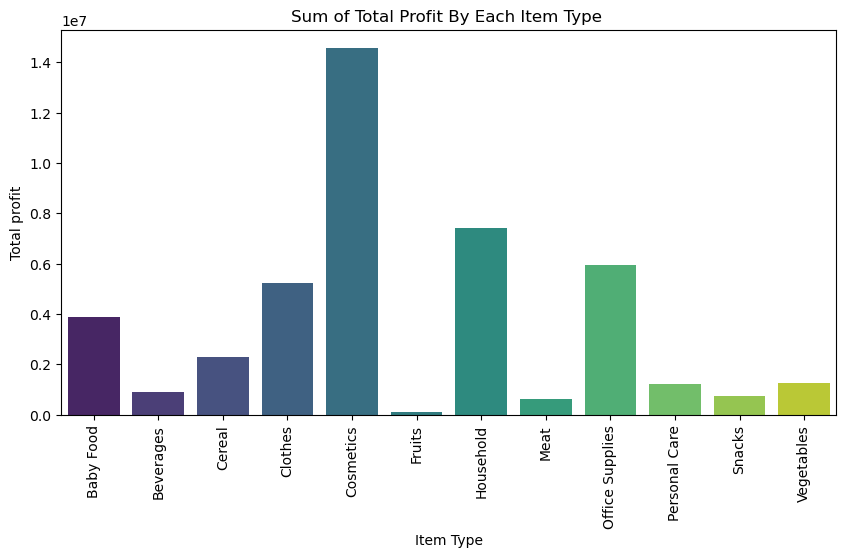

In [341]:
# ploting Each items with their profit trends

plt.figure(figsize=(10,5))
sns.barplot(x='Item Type',y='Total Profit',data=item_profit, palette='viridis')
plt.title('Sum of Total Profit By Each Item Type ')
plt.xlabel('Item Type')
plt.ylabel('Total profit')
plt.xticks(rotation=90)
plt.show()

In [343]:
# Aggregrating data for monthly sales
monthly_sales=df.groupby("Order_Month").agg({"Total Cost":"sum","Total Revenue":"sum","Total Profit":"sum",}).reset_index()
monthly_sales

,Order_Month,Total Cost,Total Revenue,Total Profit
0,1,7665610.10,10482467.12,2816857.02
1,2,17668467.26,24740517.77,7072050.51
2,3,1346472.81,2274823.87,928351.06
3,4,11426977.98,16187186.33,4760208.35
4,5,8633047.69,13215739.99,4582692.30
5,6,3044946.34,5230325.77,2185379.43
6,7,10091055.44,15669518.50,5578463.06
7,8,548888.24,1128164.91,579276.67
8,9,2970596.53,5314762.56,2344166.03
9,10,10780653.36,15287576.61,4506923.25


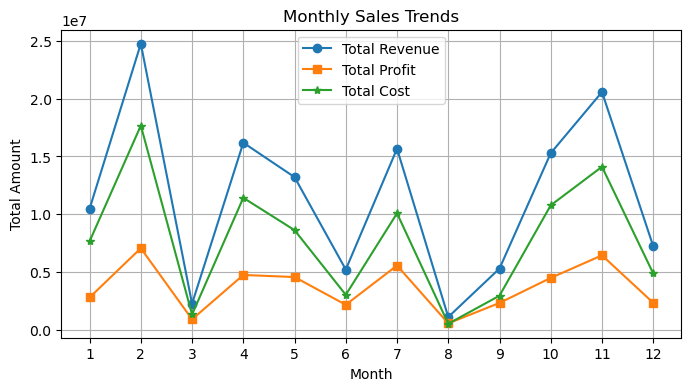

In [345]:
# Visualizing Monthly Sales Trends

plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Order_Month'],monthly_sales['Total Revenue'],marker='o',label='Total Revenue')
plt.plot(monthly_sales['Order_Month'],monthly_sales['Total Profit'],marker='s',label='Total Profit')
plt.plot(monthly_sales['Order_Month'],monthly_sales['Total Cost'],marker='*',label='Total Cost')
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.title("Monthly Sales Trends")
plt.legend()
plt.grid(True)
plt.xticks(monthly_sales['Order_Month'])
plt.show()

In [347]:
# Aggregrating data for yearly sales
yearly_sales=df.groupby("Order_Year").agg({"Total Cost":"sum","Total Revenue":"sum","Total Profit":"sum"}).reset_index()
yearly_sales

,Order_Year,Total Cost,Total Revenue,Total Profit
0,2010,12556457.49,19186024.92,6629567.43
1,2011,8388157.84,11129166.07,2741008.23
2,2012,22685634.40,31898644.52,9213010.12
3,2013,13615028.62,20330448.66,6715420.04
4,2014,10750752.75,16630214.43,5879461.68
5,2015,8431443.42,12427982.86,3996539.44
6,2016,7469029.21,12372867.22,4903838.01
7,2017,9284066.18,13373419.63,4089353.45


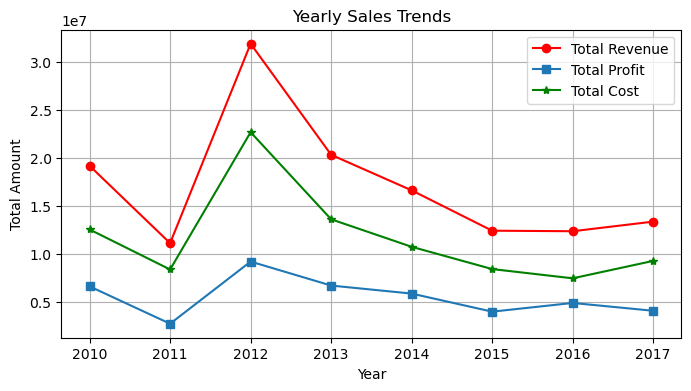

In [349]:
# Visualizing Yearly Sales Trends

plt.figure(figsize=(8,4))
plt.plot(yearly_sales['Order_Year'],yearly_sales['Total Revenue'],marker='o',label='Total Revenue',color='red')
plt.plot(yearly_sales['Order_Year'],yearly_sales['Total Profit'],marker='s',label='Total Profit')
plt.plot(yearly_sales['Order_Year'],yearly_sales['Total Cost'],marker='*',label='Total Cost',color='green')
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.title("Yearly Sales Trends")
plt.legend()
plt.grid(True)
plt.xticks(yearly_sales['Order_Year'])
plt.show()



In [351]:
# Aggregrating data for yearly monthly sales
yearly_monthly_sales=df.groupby("Order_Year_Month").agg({"Total Revenue":"sum","Total Profit":"sum",}).reset_index()
yearly_monthly_sales

,Order_Year_Month,Total Revenue,Total Profit
0,2010-02,3410661.12,1424410.94
1,2010-05,2587973.26,965441.52
2,2010-06,1082418.40,727423.20
3,2010-10,6064933.75,1495392.79
4,2010-11,3458252.00,1375311.70
5,2010-12,2581786.39,641587.28
6,2011-01,1042225.35,363509.04
7,2011-02,387002.20,127722.96
8,2011-04,2798046.49,693911.51
9,2011-05,272410.45,89904.06


In [353]:
yearly_monthly_sales['Order_Year_Month']=yearly_monthly_sales['Order_Year_Month'].astype(str)

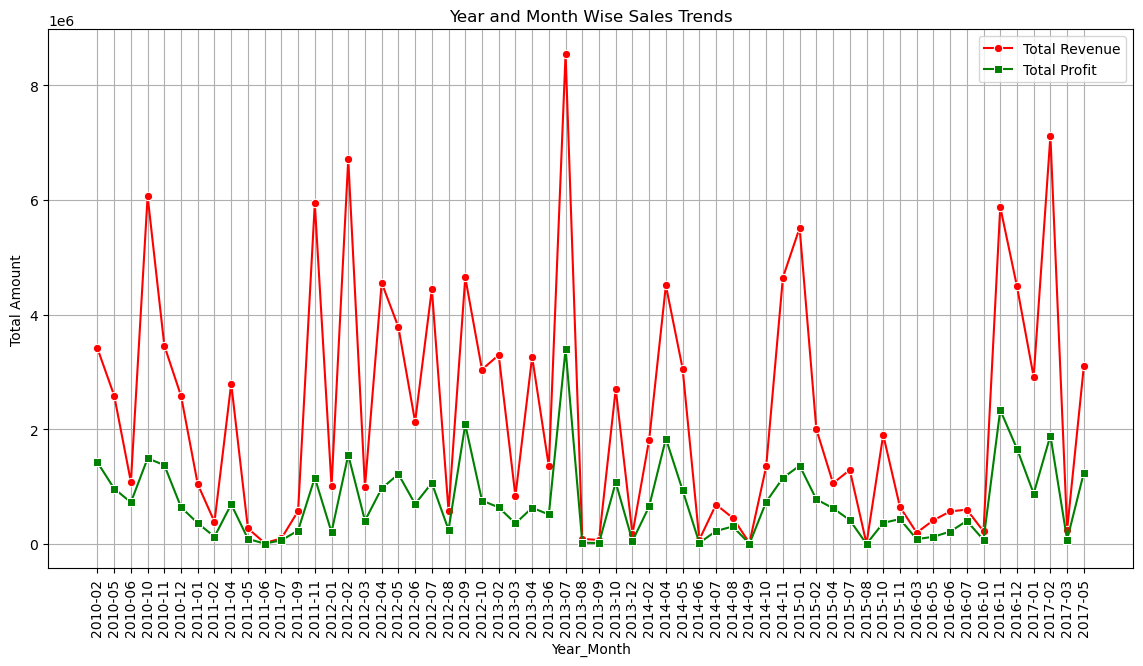

In [355]:
plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_monthly_sales,x="Order_Year_Month",y="Total Revenue",marker='o',color='red',label="Total Revenue")
sns.lineplot(data=yearly_monthly_sales,x="Order_Year_Month",y="Total Profit",marker='s',color='green',label="Total Profit")
plt.xticks(rotation=90)
plt.xlabel("Year_Month")
plt.ylabel("Total Amount")
plt.legend()
plt.grid(True)
plt.title("Year and Month Wise Sales Trends")
plt.show()

In [357]:
df['Order value']=df['Units Sold']*df['Unit Price']
aov=df['Order value'].mean()
print("Average Order Value(AOV): ",aov)

Average Order Value(AOV):  1373487.6831


In [359]:
# profit margin=(total_profit / total revenue)*100

df['Profit_margin']=(df['Total Profit']/df['Total Revenue'])*100

# Calculating Average net profit margin for entire dataset
avg=df['Profit_margin'].mean()
print("Average Profit Margin Percentage For The Entire Dataset is:",avg,"%")

Average Profit Margin Percentage For The Entire Dataset is: 36.21162285657073 %


In [361]:
#Aggregate Data For yearly_monthly profit margin
monthly_profit_margin=df.groupby("Order_Year_Month").agg({"Profit_margin":"mean"}).reset_index()
#monthly_profit_margin=monthly_profit_margin.sort_values(by='Profit_margin',ascending=False)
monthly_profit_margin

,Order_Year_Month,Profit_margin
0,2010-02,53.486249
1,2010-05,31.690789
2,2010-06,67.203514
3,2010-10,43.295251
4,2010-11,39.768984
5,2010-12,27.730896
6,2011-01,34.570790
7,2011-02,33.003161
8,2011-04,24.799856
9,2011-05,33.003161


In [363]:
# Converting Order_Year_month to string for plotting
monthly_profit_margin['Order_Year_Month']=monthly_profit_margin['Order_Year_Month'].astype(str)

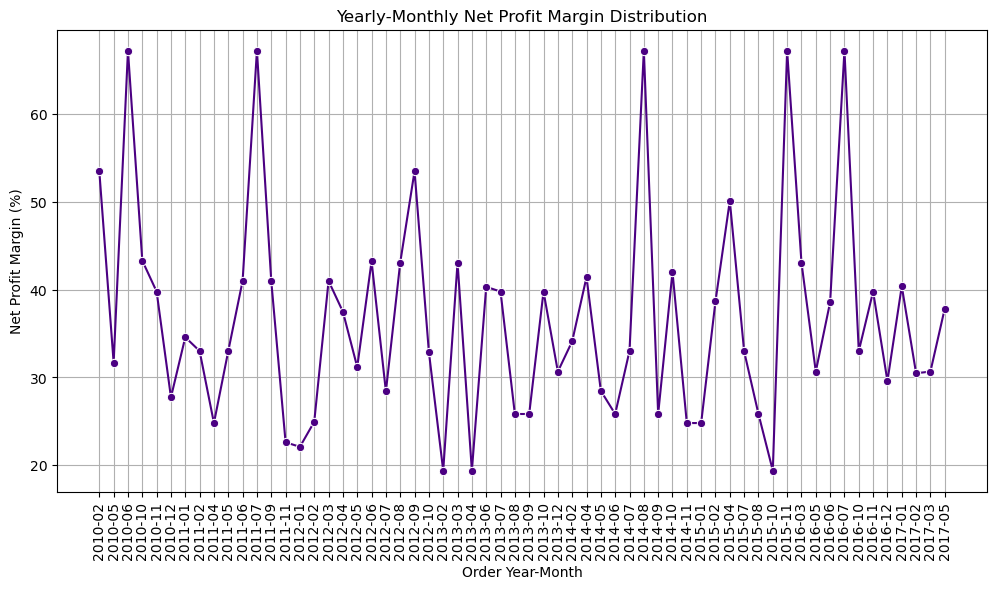

In [365]:
#Plotting Yearly-Monthly profit margin

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_profit_margin,x="Order_Year_Month",y="Profit_margin",color='indigo',marker="o")
plt.title('Yearly-Monthly Net Profit Margin Distribution')
plt.xlabel('Order Year-Month')
plt.ylabel('Net Profit Margin (%)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [367]:
item_profit_margin=df.groupby('Item Type').agg({"Profit_margin":"mean"}).reset_index()
item_profit_margin

,Item Type,Profit_margin
0,Baby Food,37.550924
1,Beverages,33.003161
2,Cereal,43.067574
3,Clothes,67.203514
4,Cosmetics,39.768984
5,Fruits,25.830654
6,Household,24.799856
7,Meat,13.558036
8,Office Supplies,19.386987
9,Personal Care,30.661936


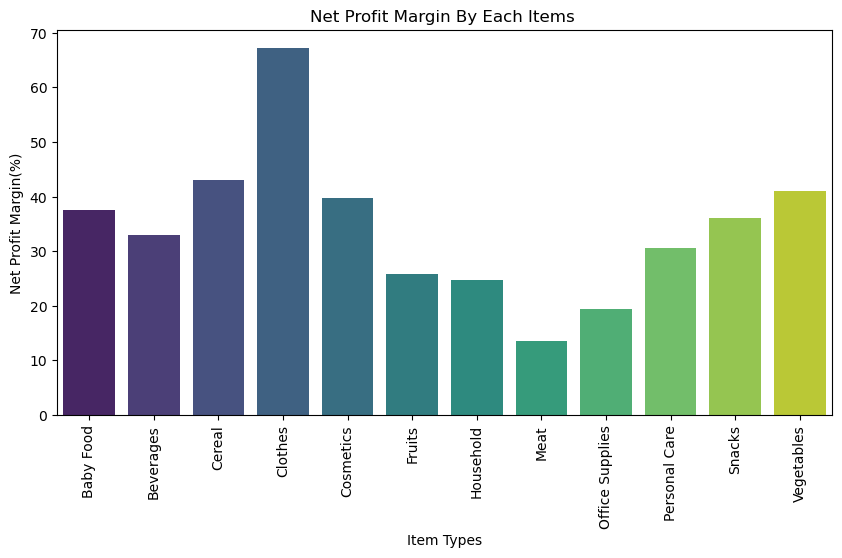

In [369]:
# plotting profit margins by each items
plt.figure(figsize=(10,5))
sns.barplot(data=item_profit_margin,x="Item Type",y="Profit_margin",palette='viridis')
plt.title("Net Profit Margin By Each Items ")
plt.xlabel("Item Types")
plt.ylabel("Net Profit Margin(%)")
plt.xticks(rotation=90)
plt.show()      

In [371]:
#Aggregating data for profit margins of sales channels
channel_profit_margin=df.groupby("Sales Channel").agg({"Profit_margin":"mean"}).reset_index()
channel_profit_margin

,Sales Channel,Profit_margin
0,Offline,35.688983
1,Online,36.734263


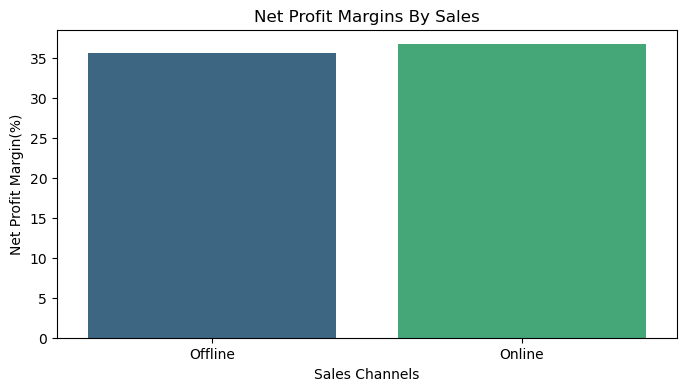

In [373]:
# plotting profit margins for sales channels
plt.figure(figsize=(8,4))
sns.barplot(data=channel_profit_margin,x='Sales Channel',y='Profit_margin',palette='viridis')
plt.title('Net Profit Margins By Sales')
plt.xlabel('Sales Channels')
plt.ylabel('Net Profit Margin(%)')
plt.show()

In [375]:
df['Shipping_Duration']=(df['Ship Date']-df['Order Date']).dt.days

In [377]:
# Aggregate average shipping duration by yearly_monthly
monthly_ship_du=df.groupby("Order_Year_Month").agg({"Shipping_Duration":"mean"}).reset_index()
monthly_ship_du=monthly_ship_du.sort_values(by='Shipping_Duration',ascending=False)
monthly_ship_du

,Order_Year_Month,Shipping_Duration
9,2011-05,50.000000
46,2015-08,47.000000
52,2016-07,44.000000
42,2015-01,44.000000
7,2011-02,41.000000
31,2013-10,39.500000
11,2011-07,39.000000
12,2011-09,38.000000
23,2012-10,37.500000
30,2013-09,37.000000


In [379]:
monthly_ship_du['Order_Year_Month']=monthly_ship_du['Order_Year_Month'].astype(str)

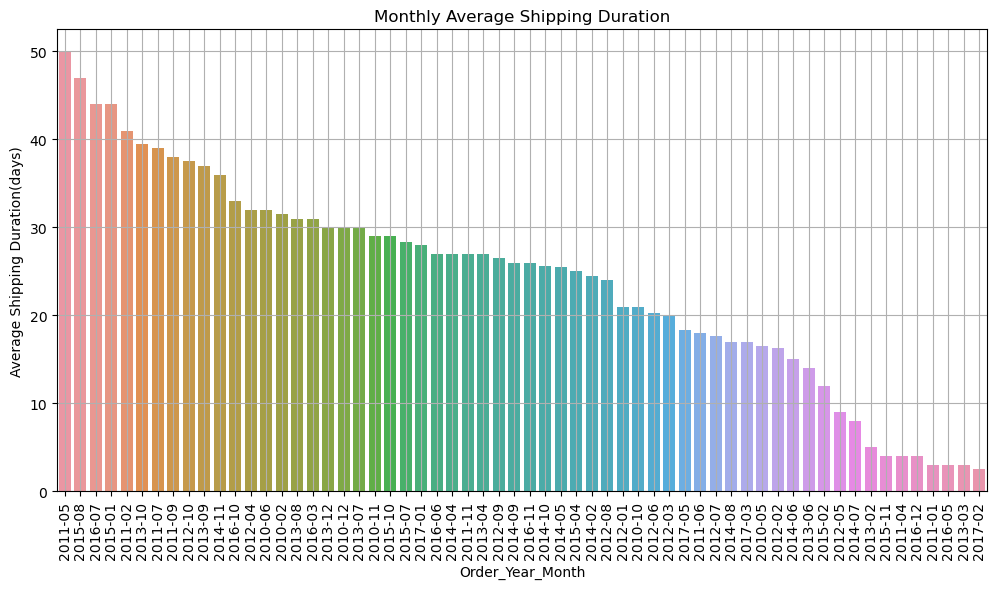

In [381]:
# Plotting Monthly Shipping Duration

plt.figure(figsize=(12,6))
sns.barplot(data=monthly_ship_du,x='Order_Year_Month',y='Shipping_Duration')
plt.title('Monthly Average Shipping Duration')
plt.xlabel('Order_Year_Month')
plt.ylabel('Average Shipping Duration(days)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [383]:
# Aggregration of Order Priortiy for Shipping Duration

pri_ship_du=df.groupby("Order Priority").agg({"Shipping_Duration":"mean"}).reset_index()
pri_ship_du

,Order Priority,Shipping_Duration
0,C,23.863636
1,H,21.400000
2,L,23.592593
3,M,25.333333


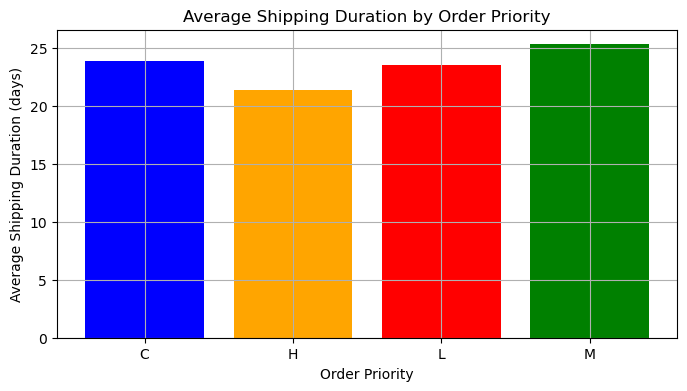

In [385]:
# plotting average shipping duration by order priority
plt.figure(figsize=(8,4))
plt.bar(pri_ship_du["Order Priority"],pri_ship_du["Shipping_Duration"],color=['blue','orange','red','green'])
plt.title('Average Shipping Duration by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Shipping Duration (days)')
plt.grid(True)
plt.show()

In [387]:
#Aggregate region for average shipping duration
re_ship_du=df.groupby("Region").agg({"Shipping_Duration":"mean"}).reset_index()
re_ship_du=re_ship_du.sort_values(by='Shipping_Duration',ascending=False)
re_ship_du

,Region,Shipping_Duration
0,Asia,28.727273
2,Central America and the Caribbean,26.714286
5,North America,25.666667
1,Australia and Oceania,24.272727
4,Middle East and North Africa,24.200000
3,Europe,24.136364
6,Sub-Saharan Africa,19.888889


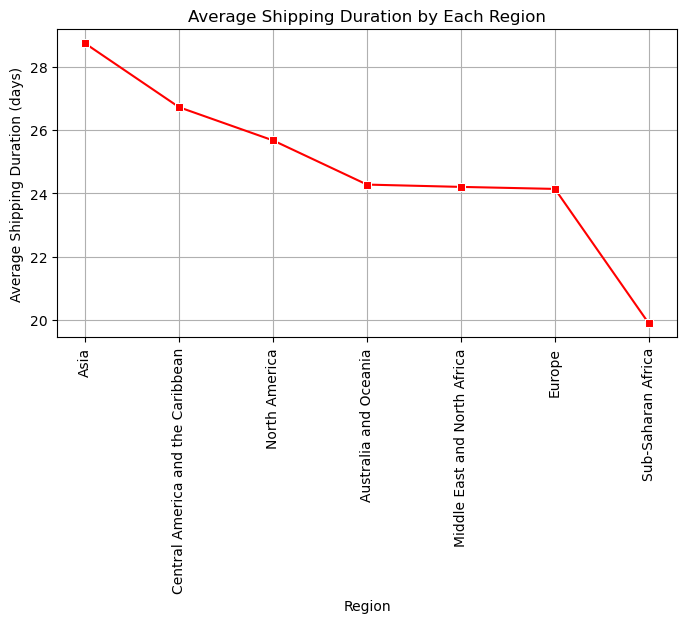

In [389]:
# plotting average shipping duration by region

plt.figure(figsize=(8,4))
sns.lineplot(data=re_ship_du,x="Region",y="Shipping_Duration",color='red',marker='s')
plt.title('Average Shipping Duration by Each Region')
plt.xlabel('Region')
plt.ylabel('Average Shipping Duration (days)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [391]:
# aggregration of sales channels for average shipping
channel_ship_du=df.groupby("Sales Channel").agg({"Shipping_Duration":"mean"}).reset_index()
channel_ship_du

,Sales Channel,Shipping_Duration
0,Offline,23.20
1,Online,23.52


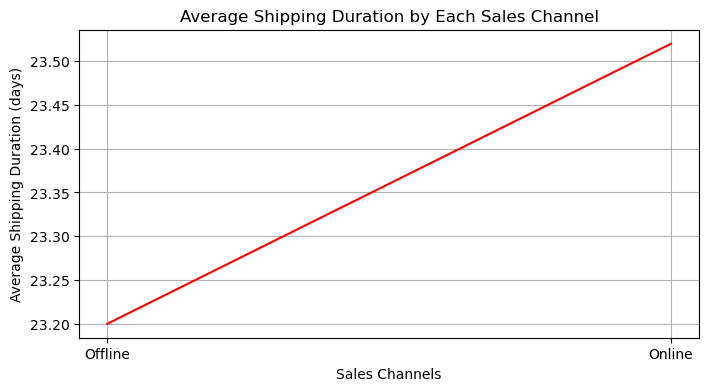

In [393]:
# plotting average shipping duration by sales channels
plt.figure(figsize=(8,4))
sns.lineplot(data=channel_ship_du,x="Sales Channel",y="Shipping_Duration",color='red')
plt.title('Average Shipping Duration by Each Sales Channel')
plt.xlabel('Sales Channels')
plt.ylabel('Average Shipping Duration (days)')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Average% Shipping Duration by Each Sales Channel')

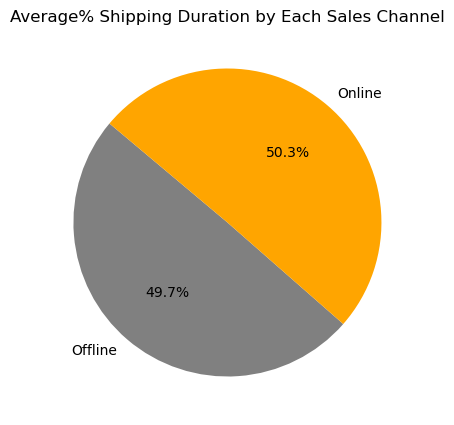

In [395]:
# Plotting Average Shipping Duration by sales channels by pie chart
plt.figure(figsize=(10,5))
plt.pie(channel_ship_du["Shipping_Duration"],labels=channel_ship_du["Sales Channel"],
       autopct='%1.1f%%',startangle=140,colors=['grey','orange'])
plt.title('Average% Shipping Duration by Each Sales Channel')

In [25]:
#Printing Object DataTypes
df.select_dtypes(include='object')
df=df.drop(['Country'],axis='columns')
df.head(3)

,Region,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Year_Month
0,Australia and Oceania,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05


In [27]:
#Encoding Item Types

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
le.fit_transform(df['Item Type'])

array([ 0,  2,  8,  5,  8,  0,  6, 11,  9,  2, 11,  3,  3,  6,  9,  3,  4,
        1,  6,  7,  0,  0, 10,  5,  9,  4,  5,  5,  1,  6,  4,  9,  8,  6,
       10,  9,  5,  7,  8,  8,  9,  4,  2, 11,  3,  2,  4,  9,  3,  8,  3,
        5,  2,  8,  5,  3,  3,  4,  6,  4,  2,  0,  8,  3,  4,  4,  9,  3,
        8,  3,  8,  5,  1,  2,  4,  6,  1, 11,  0,  4,  6,  3,  4, 10, 11,
        9,  1,  0,  5,  1,  8,  1,  8,  4,  1,  3,  5, 11,  9,  6])

In [31]:
df['en_Item_Type']=le.fit_transform(df['Item Type'])

In [33]:
# Similary Encoding For Regions
df['en_Region']=le.fit_transform(df['Region'])

In [37]:
# Similary Encoding For Sales Channel
df['en_Sales Channel']=le.fit_transform(df['Sales Channel'])

In [39]:
# Similary Encoding For order priority
df['en_Order Priority']=le.fit_transform(df['Order Priority'])
df.head(2)

,Region,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Year,Order_Month,Order_Year_Month,en_Item_Type,en_Region,en_Sales Channel,en_Order Priority
0,Australia and Oceania,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.50,951410.50,2010,5,2010-05,0,1,0,1
1,Central America and the Caribbean,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.8,328376.44,248406.36,2012,8,2012-08,2,2,1,0


In [41]:
# Importing Neccessary Library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [347]:
# Feature selection and preprocessing
#df['Order_Year_Month']=df['Order_Year_Month'].dt.to_timestamp()

feature=df[['en_Region','en_Item_Type','en_Sales Channel','en_Order Priority','Units Sold','Unit Price','Unit Cost',
            'Total Cost','Order_Month','Order_Year']]
target=df['Total Revenue']

In [349]:
feature.head()

,en_Region,en_Item_Type,en_Sales Channel,en_Order Priority,Units Sold,Unit Price,Unit Cost,Total Cost,Order_Month,Order_Year
0,1,0,0,1,9925,255.28,159.42,1582243.50,5,2010
1,2,2,1,0,2804,205.70,117.11,328376.44,8,2012
2,3,8,0,2,1779,651.21,524.96,933903.84,5,2014
3,6,5,1,0,8102,9.33,6.92,56065.84,6,2014
4,6,8,0,2,5062,651.21,524.96,2657347.52,2,2013


In [351]:
# Train-Test Split

x_train,x_test,y_train,y_test= train_test_split(feature,target,test_size=0.2,random_state=42)

In [353]:
# Training The Model

model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
# Making Prediction

y_predict=model.predict(x_test)
y_predict

array([ 616641.71320668, 2193981.78041929, 3313287.82102644,
        232689.98071776,  674820.7098945 , 2576813.33839323,
        340993.29205762, 3057050.15494381,   42719.05173038,
       2461151.48996343, 2607639.91749204, 3619979.43964778,
       1739195.42355929, 5559304.84109101,  424297.17183004,
       3290815.03038281,  591826.70343879,  585654.31635442,
        854971.88287995,   62083.18613091])

In [355]:
y_test

83     623289.30
53    2251232.97
70    3262562.10
45     197883.40
44     648030.40
39    2596374.27
22     339490.50
80    3015902.51
10      19103.44
0     2533654.00
18    2559474.10
30    3786589.20
73    1780539.20
33    5513227.50
90     617347.08
4     3296425.02
76     445033.55
77     574951.92
12     902980.64
31     173676.25
Name: Total Revenue, dtype: float64

In [55]:
model.score(x_test,y_test)

0.9972140797451141

In [57]:
# Evaluation Of Model

mse=mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
print("Mean Squared Error :",mse)
print("R2 value is: ",r2)

Mean Squared Error : 6167404257.911172
R2 value is:  0.9972140797451141


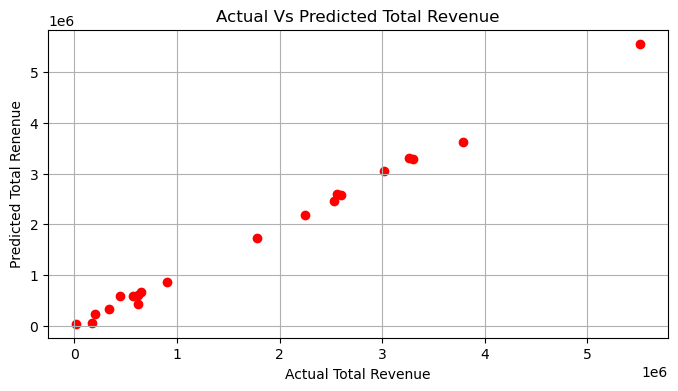

In [154]:
# Plotting Actual vs Predicted value

plt.figure(figsize=(8,4))
plt.scatter(y_test,y_predict,color='red')
plt.xlabel('Actual Total Revenue')
plt.ylabel('Predicted Total Renenue')
plt.title('Actual Vs Predicted Total Revenue')
plt.grid(True)
plt.show()

In [305]:
# Data for train the model
df1=df[['Order_Year_Month','Order_Month','Order_Year','Total Cost','Total Revenue']]
df1

,Order_Year_Month,Order_Month,Order_Year,Total Cost,Total Revenue
0,2010-05-01,5,2010,1582243.50,2533654.00
1,2012-08-01,8,2012,328376.44,576782.80
2,2014-05-01,5,2014,933903.84,1158502.59
3,2014-06-01,6,2014,56065.84,75591.66
4,2013-02-01,2,2013,2657347.52,3296425.02
...,...,...,...,...,...
95,2011-07-01,7,2011,31825.92,97040.64
96,2011-11-01,11,2011,43367.64,58471.11
97,2016-06-01,6,2016,135031.05,228779.10
98,2015-07-01,7,2015,326815.89,471336.91


In [317]:
feature=['Order_Month','Order_Year','Total Cost']
target=['Total Revenue']

In [319]:
x=df1[feature]
y=df1[target]


In [321]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [323]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [259]:
# Make prediction on the test set
y_pred=model1.predict(x_test)
y_pred.flatten()

array([ 593163.98658343, 2606763.15604742, 3630976.17144923,
        266975.83091447,  486803.608682  , 2881842.77698082,
        441219.96534113, 3208827.18943525,  132962.98819565,
       2219196.18756037, 2759027.04869128, 3214311.55391101,
       1503721.43411131, 5640055.4341918 ,  886919.45416392,
       3644385.16997073,  583339.06959138,  607175.63530088,
        496195.6287915 ,  361823.64895297])

In [261]:
model1.score(x_test,y_test)

0.9681644189151484

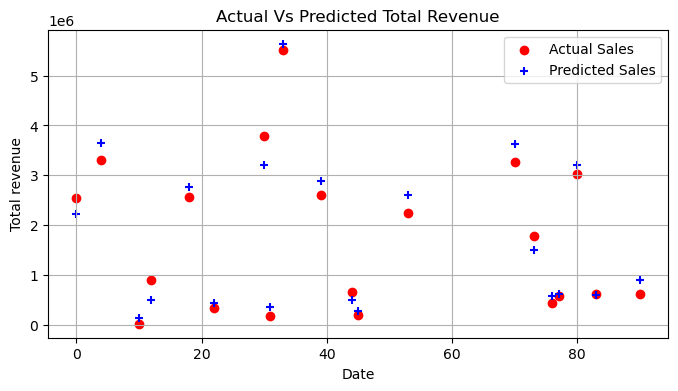

In [263]:
# Plotting Actual vs Predicted value

plt.figure(figsize=(8,4))
plt.scatter(x_test.index,y_test,color='red',label="Actual Sales",marker='o')
plt.scatter(x_test.index,y_pred,color='blue',label="Predicted Sales",marker='+')
plt.xlabel('Date')
plt.ylabel('Total revenue')
plt.title('Actual Vs Predicted Total Revenue')
plt.grid(True)
plt.legend()
plt.show()